In [116]:
import numpy as np
import pandas as pd
import scanpy as sc
import perturbseq as perturb
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [117]:
datapath='/ahg/regevdata/projects/Cell2CellCommunication/perturbseq_benchmarks/data/2018-11-09'
dataset='dc_3hr'
gsm_number='GSM2396856'
anno=datapath+'/'+dataset+'/'+gsm_number+'_'+dataset+'_cbc_gbc_dict_lenient.csv.gz' #also experiment with the strict
pref=datapath+'/'+dataset+'/'+dataset

cells2guide_file=pref+'.cell2guide.csv.gz'
guide2gene_file=pref+'.guide2gene.csv.gz'

In [118]:
adata=sc.read(pref+'.perturb.analysis.h5ad')
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 31744 × 1418 
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'C9', 'D8', 'D9', 'C8', 'B8', 'B9', 'A8', 'A9', 'louvain'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [119]:
perturb.io.read_perturbations_csv(adata,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=guide2gene_file,pref='')
adata

adata cells: 31744
annotated cells: 32777 or 100.0 percent of adata


AnnData object with n_obs × n_vars = 31744 × 1418 
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'C9', 'D8', 'D9', 'C8', 'B8', 'B9', 'A8', 'A9', 'louvain', 'm_Irf2_2', 'm_MouseNTC_100_A_67005', 'm_Hif1a_1', 'm_Irf2_1', 'm_Rel_2', 'm_E2f1_3', 'm_Ctcf_1', 'm_Irf2_3', 'm_Ctcf_2', 'm_Stat2_3', 'm_Runx1_4', 'm_Irf1_4', 'm_Stat3_3', 'm_Atf3_2', 'm_Irf1_1', 'm_Relb_1', 'm_Spi1_3', 'm_Nfkb1_4', 'm_Cebpb_1', 'm_E2f4_3', 'm_Rela_2', 'm_Ets2_3', 'm_Irf2_4', 'm_Rela_1', 'm_Hif1a_4', 'm_Irf4_3', 'm_Spi1_4', 'm_Egr2_4', 'm_Rel_3', 'm_Stat1_3', 'm_Irf4_2', 'm_Irf1_2', 'm_E2f1_4', 'm_Rel_1', 'm_Cebpb_3', 'm_Ahr_1', 'm_Maff_1', 'm_Irf4_4', 'm_Junb_4', 'm_Ahr_3', 'm_Egr1_4', 'm_Egr2_2', 'm_Nfkb1_3', 'm_Rela_3', 'm_Atf3_1', 'm_Hif1a_3', 'm_Stat1_2', 'm_Ets2_4', 'm_Spi1_2', 'm_Maff_4', 'm_Stat2_2', 'm_E2f4_2', 'm_Stat2_4', 'm_Nfkb1_2', 'm_Runx1_2', 'm_Stat1_1', 'm_E2f4_4', 'Egr1', 'Runx1', 'Spi1', 'E2f4', 'Ets2', 'Hif1a', 'Junb', 'Ctcf', 'E2f1', 'Mou

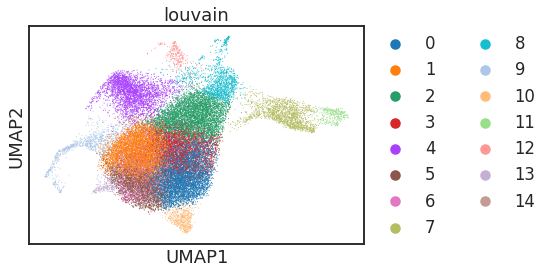

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

sc.pl.umap(adata,color=['louvain'])

QC
==

In [122]:
perturb.tl.bulk(adata,'guide.compact')

In [123]:
corr=perturb.util.corr_mat(adata.uns['bulk.guide.compact'])

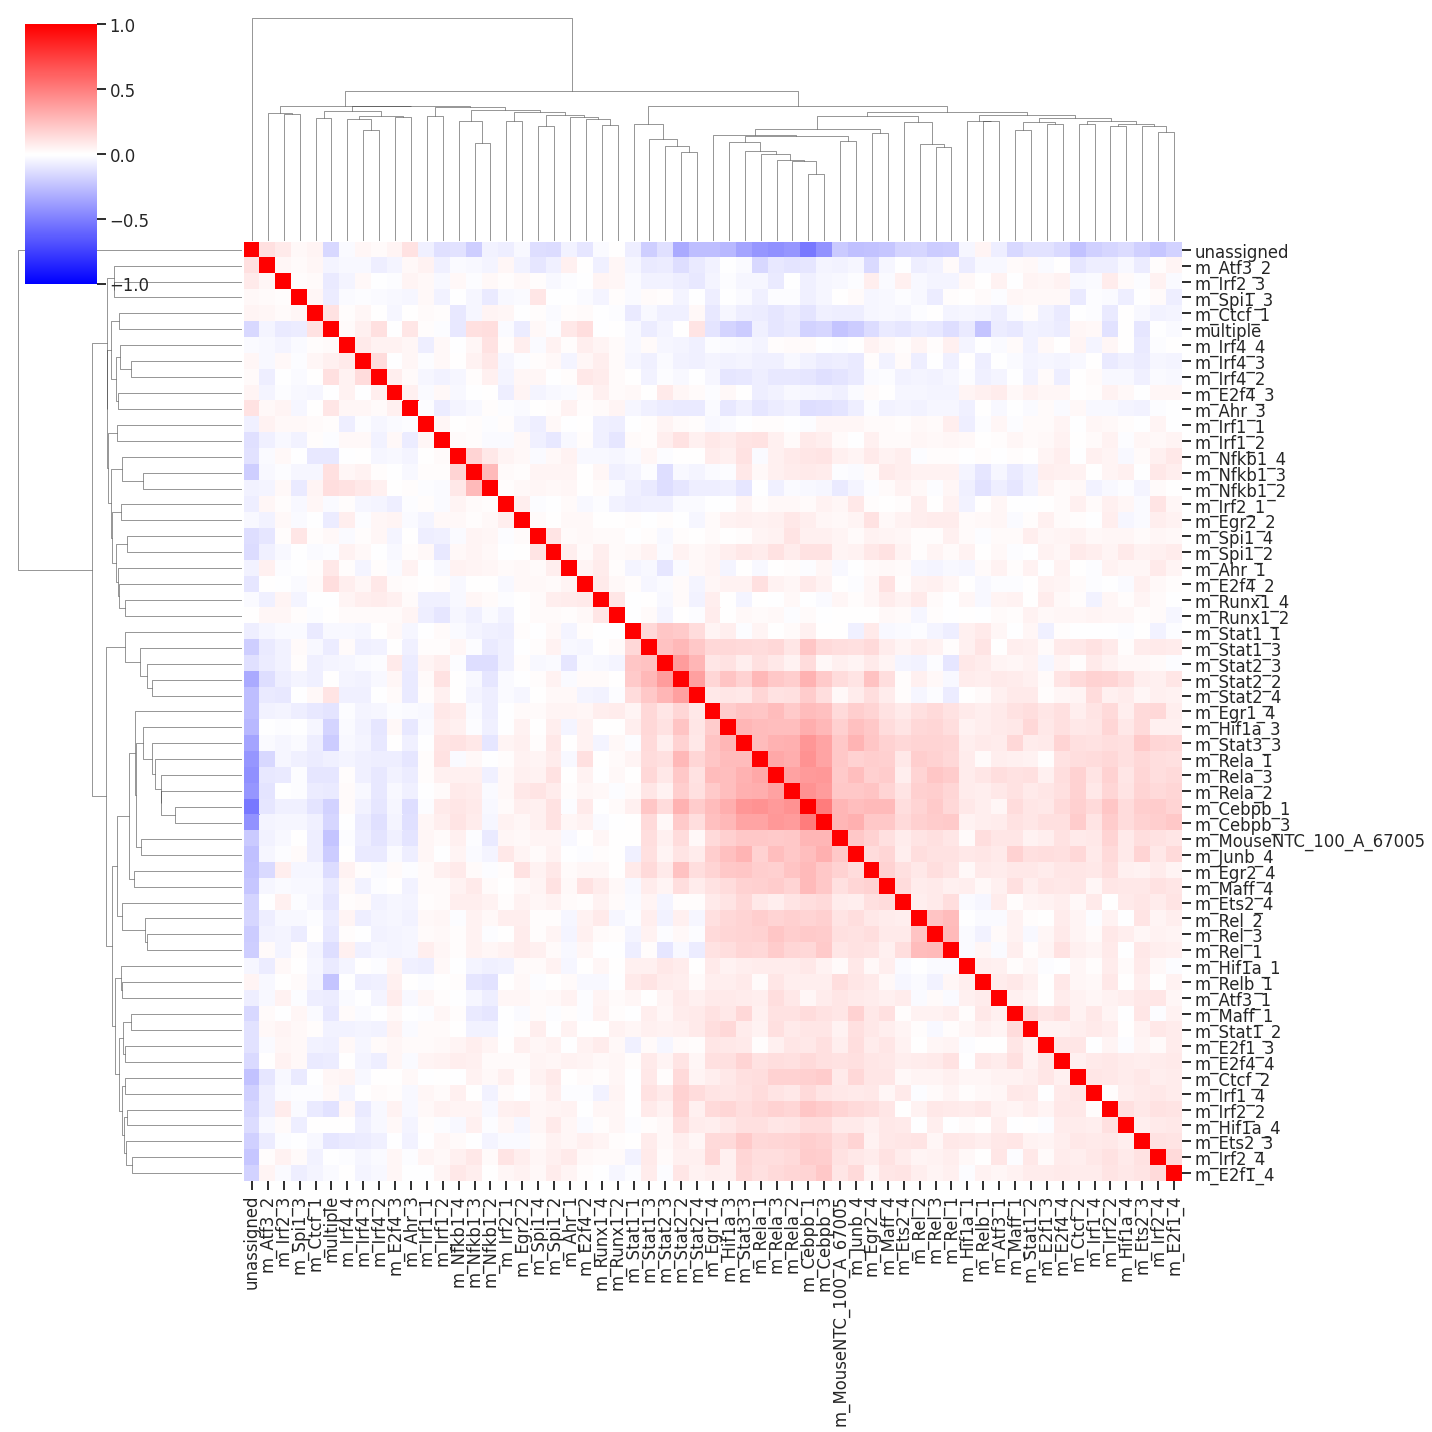

In [125]:
import seaborn as sns
sns.clustermap(corr,vmin=-1,vmax=1,
               xticklabels=True,yticklabels=True,
               figsize=(20,20),
              cmap='bwr')

Linear model
==

In [126]:
adata=adata[adata.obs['guide.compact']!='multiple',:]
adata

View of AnnData object with n_obs × n_vars = 24206 × 1418 
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'C9', 'D8', 'D9', 'C8', 'B8', 'B9', 'A8', 'A9', 'louvain', 'm_Irf2_2', 'm_MouseNTC_100_A_67005', 'm_Hif1a_1', 'm_Irf2_1', 'm_Rel_2', 'm_E2f1_3', 'm_Ctcf_1', 'm_Irf2_3', 'm_Ctcf_2', 'm_Stat2_3', 'm_Runx1_4', 'm_Irf1_4', 'm_Stat3_3', 'm_Atf3_2', 'm_Irf1_1', 'm_Relb_1', 'm_Spi1_3', 'm_Nfkb1_4', 'm_Cebpb_1', 'm_E2f4_3', 'm_Rela_2', 'm_Ets2_3', 'm_Irf2_4', 'm_Rela_1', 'm_Hif1a_4', 'm_Irf4_3', 'm_Spi1_4', 'm_Egr2_4', 'm_Rel_3', 'm_Stat1_3', 'm_Irf4_2', 'm_Irf1_2', 'm_E2f1_4', 'm_Rel_1', 'm_Cebpb_3', 'm_Ahr_1', 'm_Maff_1', 'm_Irf4_4', 'm_Junb_4', 'm_Ahr_3', 'm_Egr1_4', 'm_Egr2_2', 'm_Nfkb1_3', 'm_Rela_3', 'm_Atf3_1', 'm_Hif1a_3', 'm_Stat1_2', 'm_Ets2_4', 'm_Spi1_2', 'm_Maff_4', 'm_Stat2_2', 'm_E2f4_2', 'm_Stat2_4', 'm_Nfkb1_2', 'm_Runx1_2', 'm_Stat1_1', 'm_E2f4_4', 'Egr1', 'Runx1', 'Spi1', 'E2f4', 'Ets2', 'Hif1a', 'Junb', 'Ctcf', 'E2f

In [127]:
#set random generator we will use throughout, so we can have reproducible results
my_rng=np.random.RandomState(1234)

In [143]:
perturbations=list(set(adata.obs['guide.compact']))
print(perturbations)

['m_Irf2_2', 'm_MouseNTC_100_A_67005', 'm_Irf2_1', 'm_Hif1a_1', 'm_Rel_2', 'm_E2f1_3', 'm_Ctcf_1', 'm_Irf2_3', 'm_Ctcf_2', 'm_Stat2_3', 'm_Runx1_4', 'm_Irf1_4', 'm_Stat3_3', 'm_Irf1_1', 'm_Atf3_2', 'm_Relb_1', 'm_Spi1_3', 'm_Nfkb1_4', 'm_Irf2_4', 'm_E2f4_3', 'm_Rela_2', 'm_Cebpb_1', 'm_Ets2_3', 'm_Rela_1', 'm_Hif1a_4', 'm_Irf4_3', 'unassigned', 'm_Spi1_4', 'm_Egr2_4', 'm_Rel_3', 'm_Stat1_3', 'm_Irf4_2', 'm_Irf1_2', 'm_E2f1_4', 'm_Rel_1', 'm_Cebpb_3', 'm_Ahr_1', 'm_Maff_1', 'm_Irf4_4', 'm_Egr2_2', 'm_Ahr_3', 'm_Junb_4', 'm_Egr1_4', 'm_Nfkb1_3', 'm_Rela_3', 'm_Atf3_1', 'm_Hif1a_3', 'm_Stat1_2', 'm_Ets2_4', 'm_Spi1_2', 'm_Stat2_2', 'm_Maff_4', 'm_E2f4_2', 'm_Stat2_4', 'm_Nfkb1_2', 'm_Runx1_2', 'm_Stat1_1', 'm_E2f4_4']


In [129]:
#run on a smaller subset for fast runtime
perturbations=[x for x in perturbations if ('Stat1' in x) or ('Stat2' in x) or ('Nfkb' in x)]
print(perturbations)

['m_Stat2_3', 'm_Nfkb1_4', 'm_Stat1_3', 'm_Nfkb1_3', 'm_Stat1_2', 'm_Stat2_2', 'm_Stat2_4', 'm_Nfkb1_2', 'm_Stat1_1']


In [144]:
X=pd.DataFrame(adata.obs.loc[:,perturbations],
               index=adata.obs_names,
               columns=perturbations)
X.sum(axis=1).max() #######

1.0

In [145]:
y=pd.DataFrame(adata.X,
               index=adata.obs_names,
               columns=adata.var_names)
y.shape

(24206, 1418)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
reg=linear_model.ElasticNet(l1_ratio=0.5,alpha=0.0005,max_iter=10000,
                            random_state=my_rng)
reg.fit(X,y)

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=RandomState(MT19937) at 0x2AD5C45F0A98,
           selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
beta=pd.DataFrame(reg.coef_,
                  index=y.columns,
                  columns=X.columns,
                  )
beta.shape

(1418, 58)

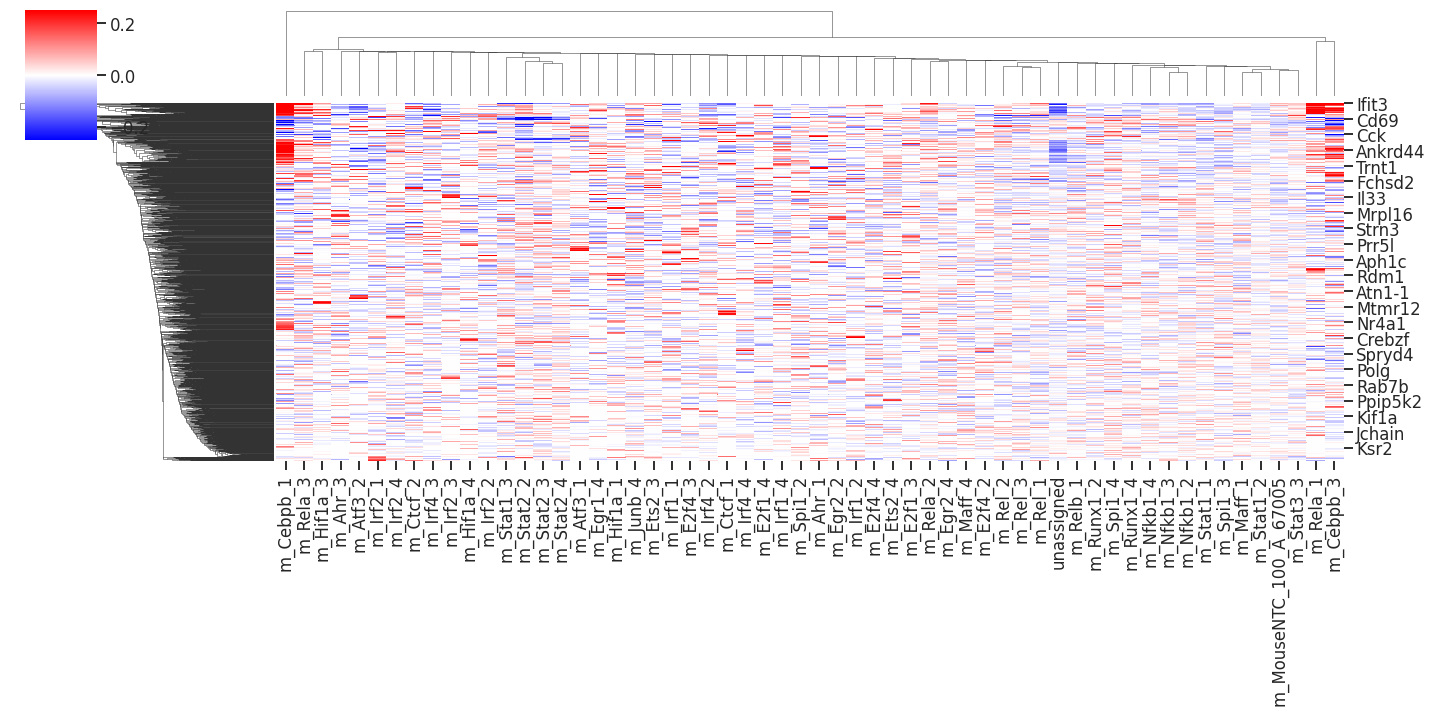

In [151]:
x=0.25
sns.clustermap(beta,vmin=-x,vmax=x,cmap='bwr',
               xticklabels=True,figsize=(20,10),
              )

Adjust X
==

In [152]:
import sys
sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import mimosca

In [153]:
#adjust for cases where the guide didn't work


adjust_vars_idx=perturbations
X_adjust=pd.DataFrame(np.array(mimosca.bayes_cov_col(y,
                                                pd.DataFrame(X,
                                                            index=X.index),
                                                adjust_vars_idx,
                                                reg)),
                              index=X.index,
                              columns=X.columns)

Text(0.5, 0, 'adjusted x')

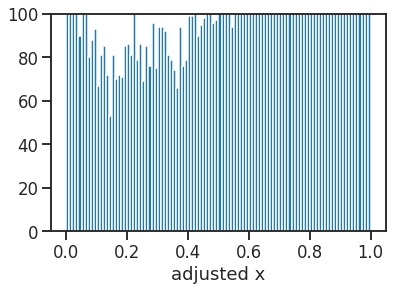

In [154]:
a=plt.hist(np.array(X_adjust).flatten(),100)
plt.ylim(0,100)
plt.xlabel('adjusted x')

Text(0, 0.5, 'adjusted X')

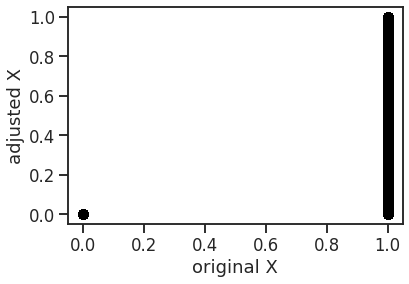

In [155]:
plt.scatter(np.array(X).flatten(),
           np.array(X_adjust).flatten(),
           alpha=0.05,color='black'
          )
plt.xlabel('original X')
plt.ylabel('adjusted X')

In [156]:
#re-train model with adjusted X
reg2=linear_model.ElasticNet(l1_ratio=0.5,alpha=0.0005,max_iter=10000,
                            random_state=my_rng)
reg2.fit(X_adjust,y)

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=RandomState(MT19937) at 0x2AD5C45F0A98,
           selection='cyclic', tol=0.0001, warm_start=False)

In [157]:
beta2=pd.DataFrame(reg2.coef_,
                  index=y.columns,
                  columns=X.columns,
                  )

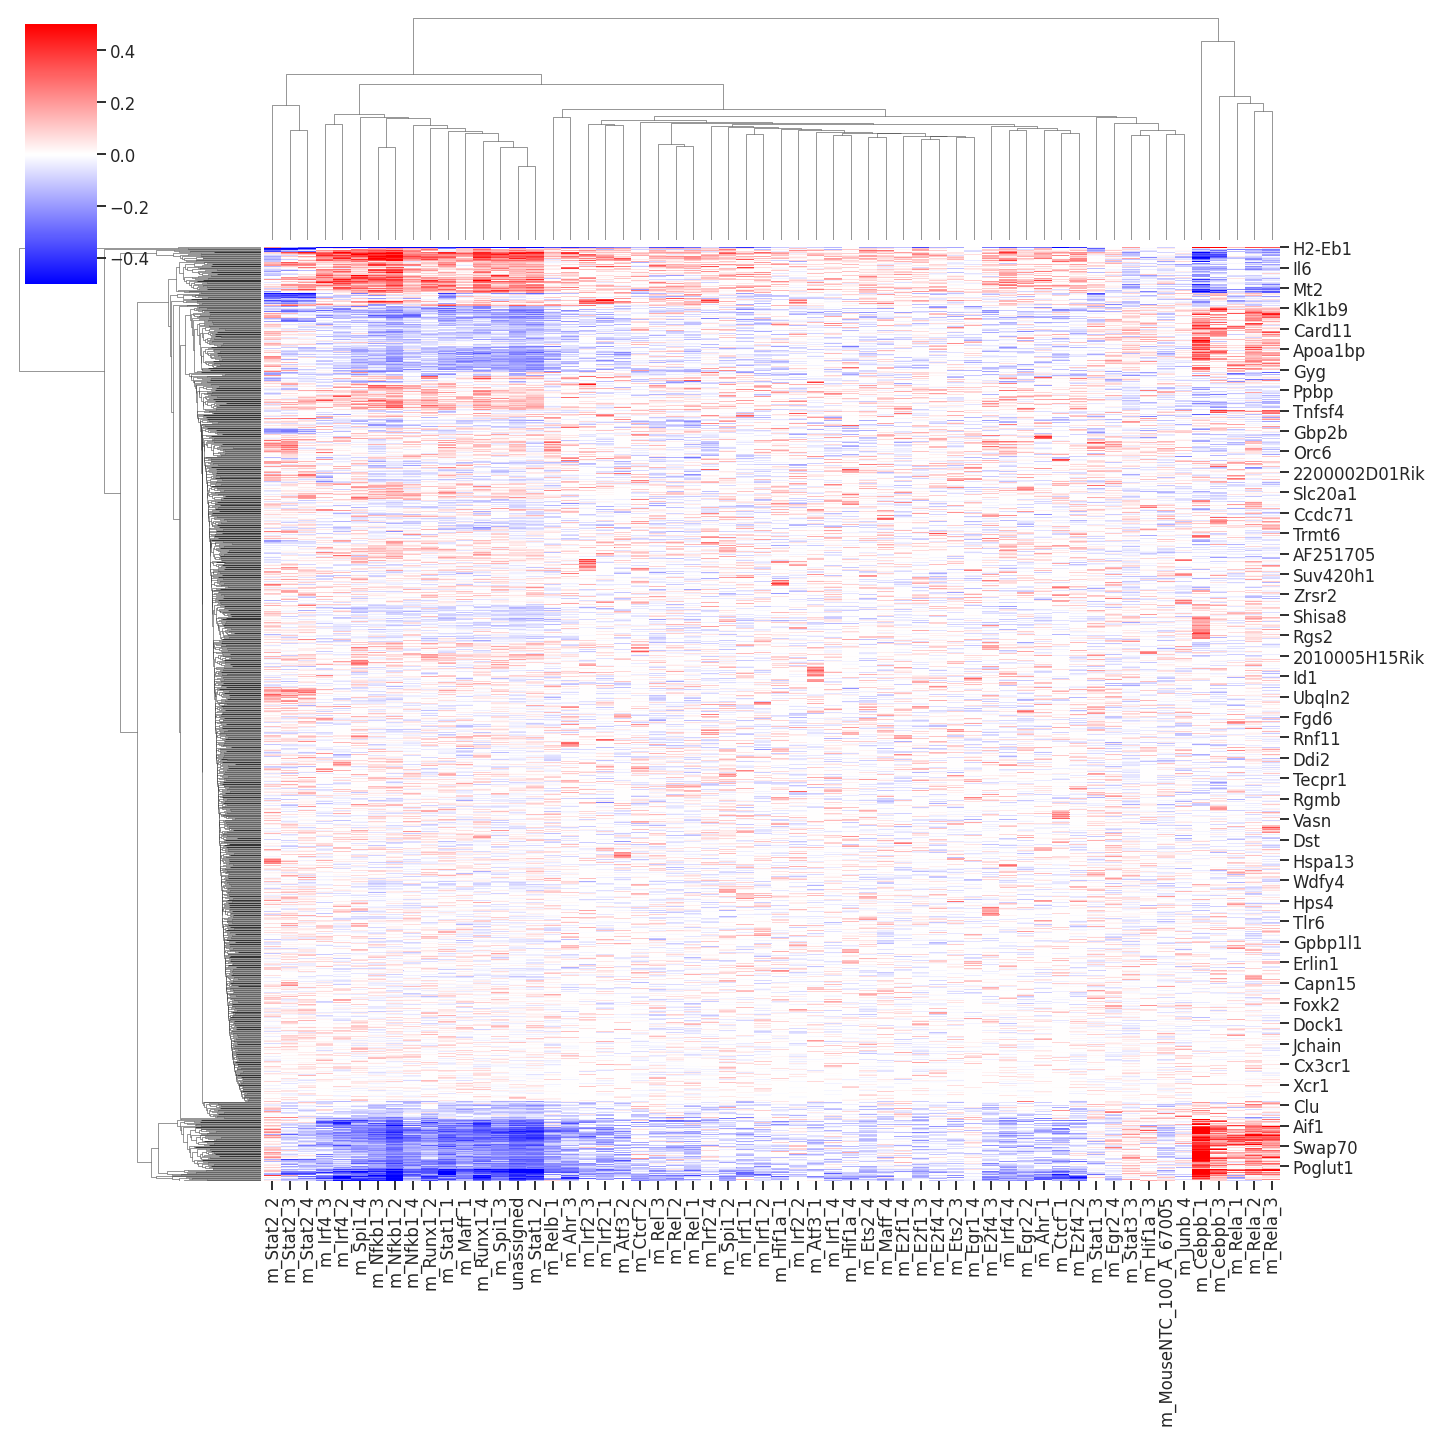

In [159]:
x=0.5
sns.clustermap(beta2,vmin=-x,vmax=x,cmap='bwr',
              xticklabels=True,figsize=(20,20),
              )